### Machine Learning Lab - 03
### 30 April , 2022
### 21BDA33
### Shivanshi Maheshwari

#### (A)Pick a dataset, perform EDA and draw conclusions and finally build a Logistic Regression model. 
#### Define the following and evaluate your model by finding the following metrics: 
##### a.Confusion matrix, 
##### b.Precision, 
##### c.Recall, 
##### d.F1-score, 
##### e.Sensitivity, 
##### f.Specificity, 
##### g.Misclassification rate, 
##### h.ROC, AUROC

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df=sns.load_dataset("titanic")

In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.shape

(891, 15)

In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
(df.isna().sum()/891)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
(df.isna().sum()/df.shape[0])*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [12]:
model_df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'embarked','deck','embark_town']]

In [13]:
model_df.rename(columns = {'class':'class1'}, inplace = True)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_60206/1704201090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.rename(columns = {'class':'class1'}, inplace = True)


In [14]:
df.rename(columns = {'class':'class1'}, inplace = True)

## How to Compute Missing Values???

#### mean, median, mode
#### category that appears max times
#### KNN imputer

In [15]:
y = model_df.survived

In [16]:
model_df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [17]:
model_df[~model_df.class1.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,class1,embarked,deck,embark_town
0,0,3,male,22.0,1,0,7.2500,Third,S,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,First,C,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Third,S,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,First,S,C,Southampton
4,0,3,male,35.0,0,0,8.0500,Third,S,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,S,NaN,Southampton
887,1,1,female,19.0,0,0,30.0000,First,S,B,Southampton
888,0,3,female,NaN,1,2,23.4500,Third,S,NaN,Southampton
889,1,1,male,26.0,0,0,30.0000,First,C,C,Cherbourg


In [18]:
df.class1.isna().astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: class1, Length: 891, dtype: int64

In [19]:
model_df['class_missing'] = model_df.class1.isna()

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_60206/676617009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['class_missing'] = model_df.class1.isna()


In [20]:
model_df.drop(columns = ['class1'], inplace = True)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_60206/1322411055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.drop(columns = ['class1'], inplace = True)


In [21]:
model_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,class_missing
0,0,3,male,22.0,1,0,7.2500,S,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,Southampton,False
3,1,1,female,35.0,1,0,53.1000,S,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,Southampton,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,Southampton,False
887,1,1,female,19.0,0,0,30.0000,S,B,Southampton,False
888,0,3,female,NaN,1,2,23.4500,S,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,C,Cherbourg,False


In [22]:
model_df.pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64

In [23]:
model_df.sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: sex, dtype: float64

In [24]:
model_df.sibsp.value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64

In [25]:
model_df.parch.value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64

In [26]:
model_df.embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64

In [27]:
model_df.groupby('survived')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [28]:
model_df.groupby('survived')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [29]:
model_df.age.mean()

29.69911764705882

In [30]:
model_df.age.fillna(model_df.age.mean(),inplace=True)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_60206/2742671042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.age.fillna(model_df.age.mean(),inplace=True)


In [31]:
model_df.isna().sum()

survived           0
pclass             0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           2
deck             688
embark_town        2
class_missing      0
dtype: int64

In [32]:
model_df = model_df[~model_df['embarked'].isna()]

In [33]:
model_df[model_df['class_missing']==True].shape

(0, 11)

In [34]:
model_df[model_df['class_missing']].shape

(0, 11)

In [35]:
model_df[~model_df['class_missing']].shape

(889, 11)

In [36]:
model_df.shape

(889, 11)

In [37]:
model_df['class_missing'] = np.where(model_df['class_missing'], 1, 0)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_60206/2511014924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['class_missing'] = np.where(model_df['class_missing'], 1, 0)


In [38]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       889 non-null    int64   
 1   pclass         889 non-null    int64   
 2   sex            889 non-null    object  
 3   age            889 non-null    float64 
 4   sibsp          889 non-null    int64   
 5   parch          889 non-null    int64   
 6   fare           889 non-null    float64 
 7   embarked       889 non-null    object  
 8   deck           201 non-null    category
 9   embark_town    889 non-null    object  
 10  class_missing  889 non-null    int64   
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 77.6+ KB


In [39]:
model_df.deck.value_counts(normalize=True)

C    0.293532
B    0.223881
D    0.164179
E    0.159204
A    0.074627
F    0.064677
G    0.019900
Name: deck, dtype: float64

In [40]:
model_df.deck.mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [41]:
model_df.deck.fillna('C',inplace=True)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_60206/3321717108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.deck.fillna('C',inplace=True)


In [42]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       889 non-null    int64   
 1   pclass         889 non-null    int64   
 2   sex            889 non-null    object  
 3   age            889 non-null    float64 
 4   sibsp          889 non-null    int64   
 5   parch          889 non-null    int64   
 6   fare           889 non-null    float64 
 7   embarked       889 non-null    object  
 8   deck           889 non-null    category
 9   embark_town    889 non-null    object  
 10  class_missing  889 non-null    int64   
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 77.6+ KB


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class1       891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [44]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [45]:
df.embark_town.isna().sum()

2

In [46]:
model_df.embark_town.fillna('Southampton',inplace=True)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_60206/830246540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.embark_town.fillna('Southampton',inplace=True)


# EXPLORATORY DATA ANALYSIS

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

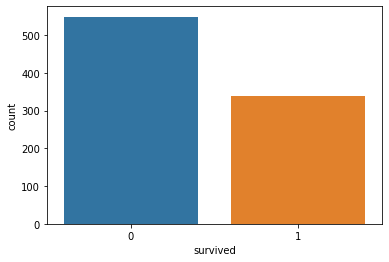

In [47]:
sns.countplot(model_df['survived'])

In [48]:
print(model_df.survived.sum()/model_df.survived.count())

0.38245219347581555


## 38% people survived

In [49]:
model_df.groupby(['survived','sex'])['survived'].count()

survived  sex   
0         female     81
          male      468
1         female    231
          male      109
Name: survived, dtype: int64

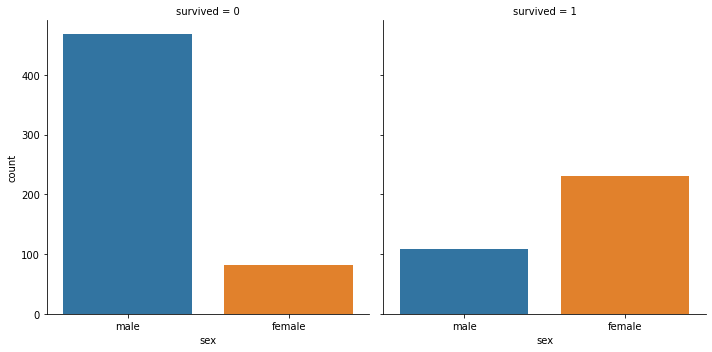

In [50]:
sns.catplot(x='sex', col='survived', kind='count', data=model_df);

## More females Survived than Males

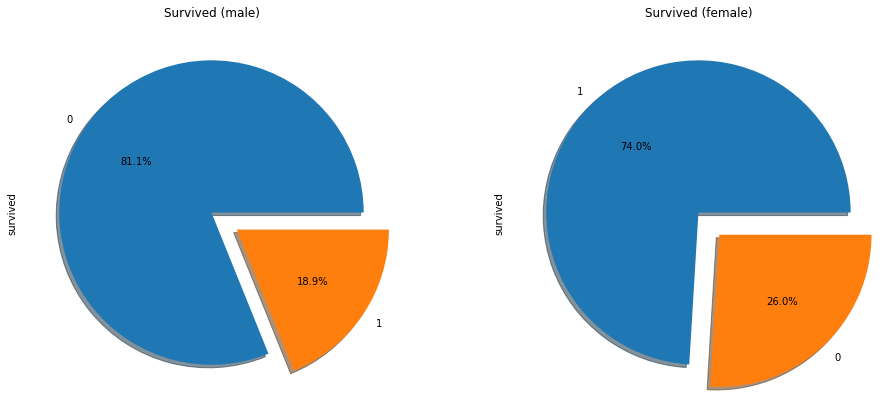

In [51]:
f,ax=plt.subplots(1,2,figsize=(16,7))
model_df['survived'][model_df['sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
model_df['survived'][model_df['sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

## Only 18.9% of males Survived but 74% of females survived

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


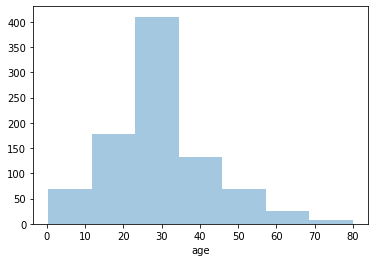

In [52]:
plot2 = sns.distplot(model_df['age'],bins=7,kde=False)

## Most of the people are aged between 30 to 40

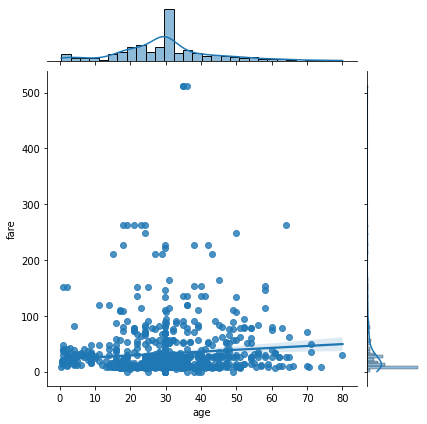

In [53]:
plot3 = sns.jointplot(x = model_df['age'], y = model_df['fare'], kind = 'reg')

## It is visible that people with higher ages and lower ages, pay comparitively less fare

In [54]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       889 non-null    int64   
 1   pclass         889 non-null    int64   
 2   sex            889 non-null    object  
 3   age            889 non-null    float64 
 4   sibsp          889 non-null    int64   
 5   parch          889 non-null    int64   
 6   fare           889 non-null    float64 
 7   embarked       889 non-null    object  
 8   deck           889 non-null    category
 9   embark_town    889 non-null    object  
 10  class_missing  889 non-null    int64   
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 77.6+ KB


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


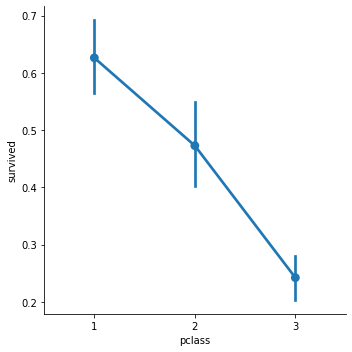

In [55]:
sns.catplot('pclass','survived', kind='point', data=model_df);

## There is a positive relationship between pclass and survival.

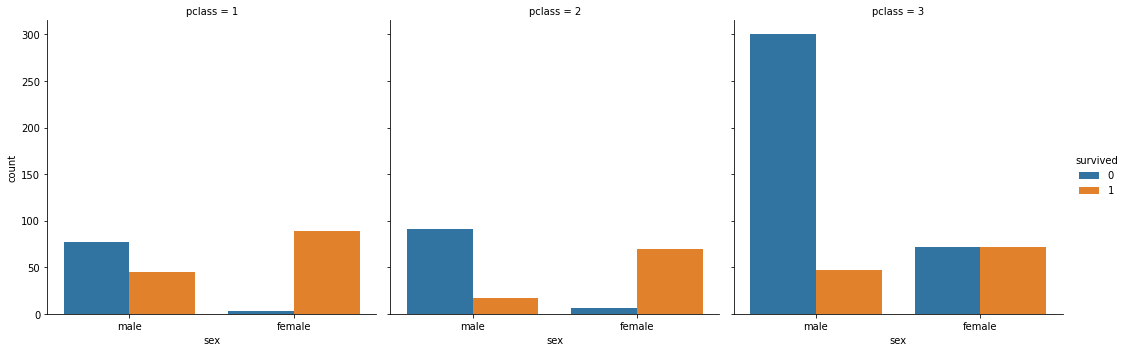

In [56]:
sns.catplot(x='sex', col='pclass', kind='count',hue='survived',data=model_df);

## From the above plot we saw that, more people more first class survived and we have already established that more females have survived.

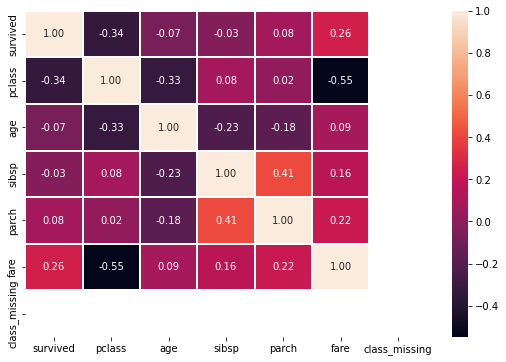

In [57]:
corr = model_df.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()


# LOGISTIC REGRESSION

In [58]:
pd.get_dummies(data=model_df)

,survived,pclass,age,sibsp,parch,fare,class_missing,sex_female,sex_male,embarked_C,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.000000,1,0,7.2500,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
887,1,1,19.000000,0,0,30.0000,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0


In [59]:
model_df_final = pd.get_dummies(data=model_df, drop_first=True)

In [60]:
model_df_final.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class_missing',
       'sex_male', 'embarked_Q', 'embarked_S', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [61]:
X = model_df_final[['pclass', 'age', 'sibsp', 'parch', 'fare', 'class_missing',
       'sex_male', 'embarked_Q', 'embarked_S']]

In [62]:
y = model_df_final['survived']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [64]:
clf = LogisticRegression(random_state=0)

In [65]:
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [66]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1])

In [67]:
clf.score(X_train, y_train)

0.8022508038585209

In [68]:
clf.score(X_test, y_test)

0.7940074906367042

In [69]:
#Cut off analysis
clf.predict_proba(X_test)[:,1]

array([0.10968302, 0.95212687, 0.77789225, 0.24290797, 0.95733171,
       0.11387229, 0.28591237, 0.14405875, 0.91814582, 0.9620457 ,
       0.3809196 , 0.57402221, 0.04250465, 0.13465054, 0.1057986 ,
       0.11314696, 0.34587885, 0.16143814, 0.26349091, 0.10255538,
       0.28583563, 0.92870251, 0.06030872, 0.61498337, 0.10258923,
       0.50300422, 0.29323862, 0.8598039 , 0.49503713, 0.27576249,
       0.50973763, 0.68334575, 0.10258923, 0.55447976, 0.04291298,
       0.32922147, 0.77625683, 0.80048599, 0.16191765, 0.10258923,
       0.14009058, 0.55850149, 0.30433745, 0.11864852, 0.43827414,
       0.50495939, 0.77454283, 0.12800487, 0.21182033, 0.93401247,
       0.91961221, 0.77616061, 0.13843566, 0.1071758 , 0.89920901,
       0.87776632, 0.56183677, 0.07036643, 0.1737648 , 0.24181308,
       0.34096935, 0.52108316, 0.80775044, 0.17386183, 0.82921952,
       0.35314447, 0.04444516, 0.12153559, 0.91303672, 0.96801284,
       0.26817276, 0.97332393, 0.70992648, 0.11427905, 0.44285

# NAIVE BAYES CLASSIFIER

In [70]:
from sklearn.naive_bayes import GaussianNB
gnbclassifier = GaussianNB()
gnbclassifier.fit(X_train, y_train)

GaussianNB()

In [71]:
pred=gnbclassifier.predict(X_test)

In [72]:
pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0])

In [73]:
gnbclassifier.score(X_test, y_test)

0.7827715355805244

In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7827715355805244

### The model has 78.28% accuracy

# EVALUATION METRICS



## Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, pred)  

cm 

array([[135,  32],
       [ 26,  74]])

### We can see that:
#### True Positive = 74
#### True Negative = 135
#### False Positive = 32
#### False Negative = 26

In [76]:
print(sum(cm.diagonal())/sum(cm.sum(axis=1)))

0.7827715355805244


In [77]:
cm.sum(axis=1)

array([167, 100])

#### The confusion Matrix also shows 78.28% accuracy

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

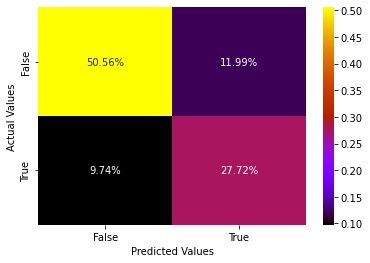

In [78]:
plotcm = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='gnuplot')
plotcm.set_xlabel('Predicted Values')
plotcm.set_ylabel('Actual Values');
plotcm.xaxis.set_ticklabels(['False','True'])
plotcm.yaxis.set_ticklabels(['False','True'])

## Precicion Score

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score
prec_score = precision_score(y_test, pred)
prec_score

0.6981132075471698

#### The Precision score is almost 70%.
#### This says that there is a 70% chance of a person surviving, if the model says that he/she would survive

## Recall Score

In [80]:
r_score = recall_score(y_test, pred)
r_score

0.74

#### The model correctly identifies Survival Chance, 74% of the times

## f1 Score

In [81]:
f1score = f1_score(y_test, pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
f1score

0.7184466019417476

#### Range is between 0 and 1. Closer to 1, better model. 
#### Therefore, we have a moderately good model.

## Sensitivity

In [82]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)


Sensitivity :  0.8083832335329342


#### Sensitivity is the proportion of true positives that are correctly predicted by the model 
#### ~81% of the true positives are correctly predicted by our model

## Specificity

In [83]:
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)


Specificity :  0.74


#### Specificity is the proportion of true negatives that are correctly predicted by the model.
#### 74% of the true negatives were correctly predicted. 

## Miscalculation Rate

In [84]:
ms_rate = (cm[0,1]+cm[1,0])/len(pred)
ms_rate

0.21722846441947566

#### Our model incorrectly predicted ~22% of the times.

## ROC and AUROC

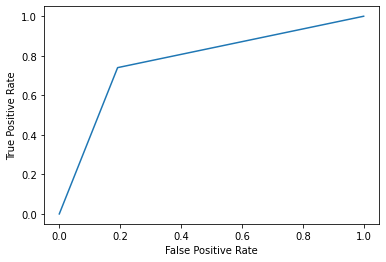

AUC Value: 0.7741916167664671


In [85]:
from sklearn import metrics
#defining metrics
y_pred = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)

#creating ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#Getting AUC value 
auc = metrics.roc_auc_score(y_test, pred)
print("AUC Value:",auc)


#### Since value is close to 1, it is a good model for classification. 

In [86]:
from sklearn.metrics import classification_report
target_names=['False','True']
print(classification_report(y_test, pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

       False     0.8385    0.8084    0.8232       167
        True     0.6981    0.7400    0.7184       100

    accuracy                         0.7828       267
   macro avg     0.7683    0.7742    0.7708       267
weighted avg     0.7859    0.7828    0.7839       267



## GRID SEARCH CROSS VALIDATION

In [87]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf=RandomForestClassifier(random_state=42)

In [89]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
accuracy_score(y_test, rf.predict(X_test))

0.7677902621722846

In [92]:
# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [93]:
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
